In [1]:
import pandas as pd
import matplotlib.pyplot as plt


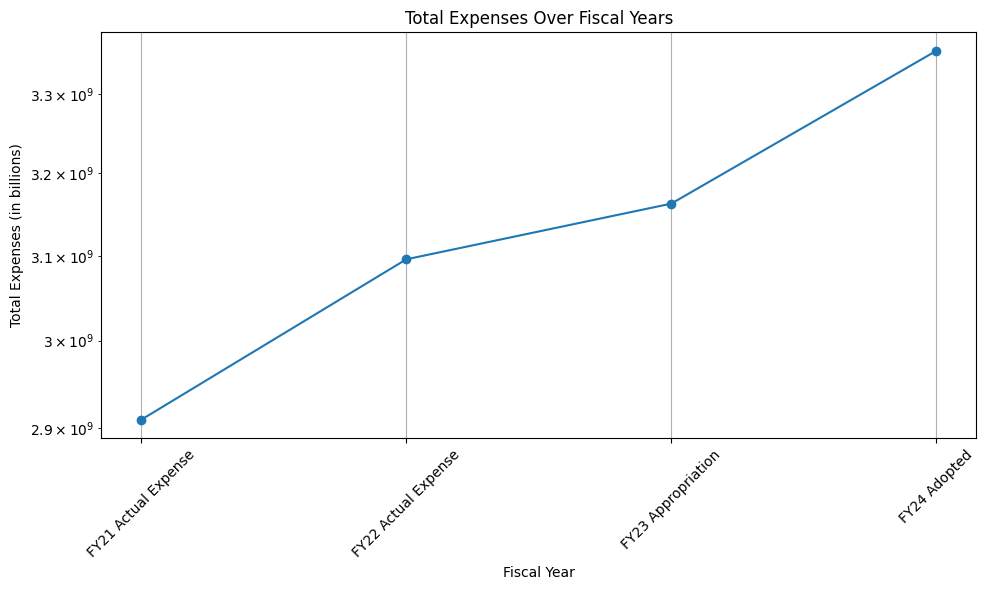

In [11]:
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('./data/fy24-adopted-operating-budget.csv')

# Convert the expense columns to numeric values, ignoring non-numeric data
expense_columns = ['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation', 'FY24 Adopted']
data[expense_columns] = data[expense_columns].apply(pd.to_numeric, errors='coerce')

# Summing up the expenses for each fiscal year
yearly_expenses = data[expense_columns].sum()

# Plotting the total expenses over the years as a line graph
plt.figure(figsize=(10, 6))
yearly_expenses.plot(kind='line', marker='o')
plt.title('Total Expenses Over Fiscal Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Expenses (in billions)')
plt.yscale('log')
plt.grid(True)
plt.xticks(range(len(expense_columns)), expense_columns, rotation=45)
plt.tight_layout()
plt.show()


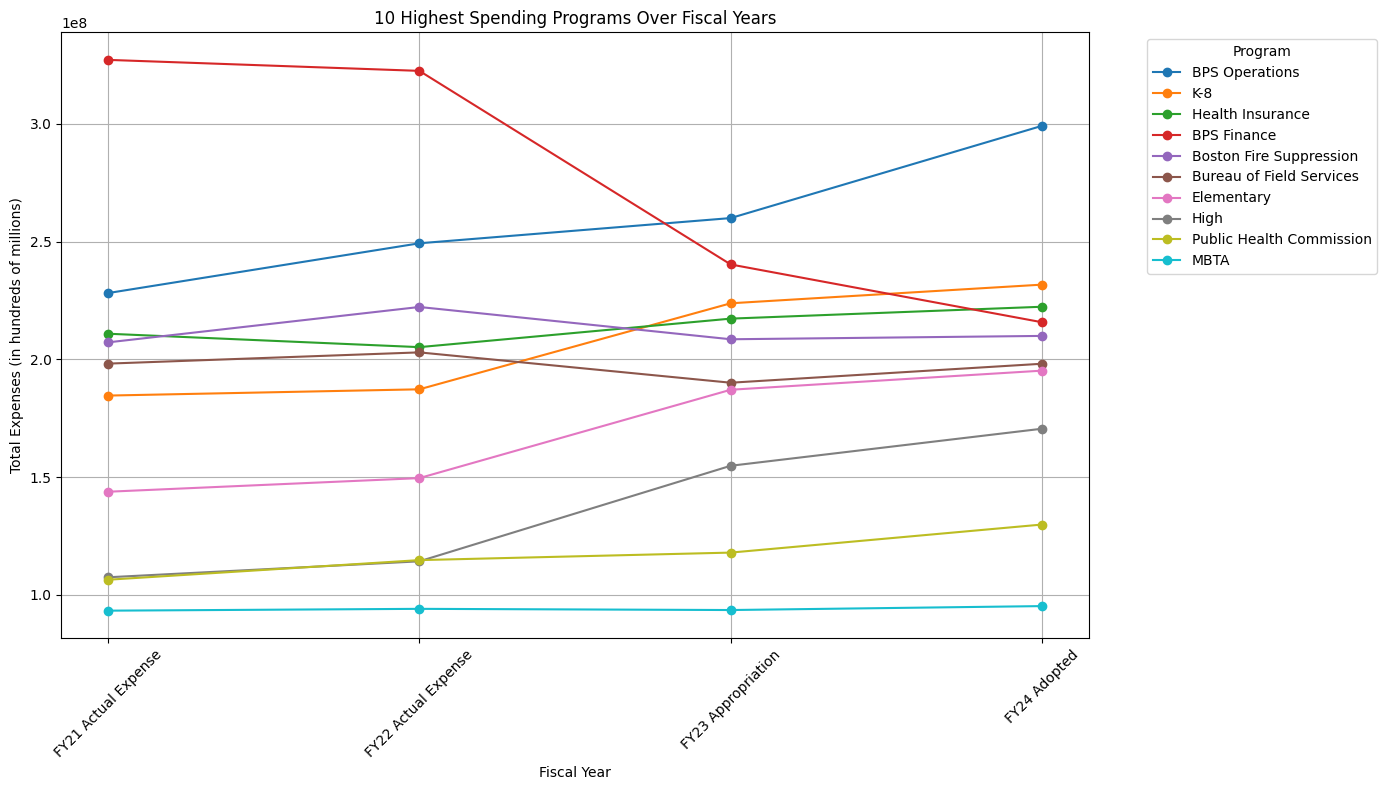

In [9]:
import matplotlib.pyplot as plt

# Convert the expense columns to numeric values, ignoring non-numeric data
expense_columns = ['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation', 'FY24 Adopted']
data[expense_columns] = data[expense_columns].apply(pd.to_numeric, errors='coerce')

# Group the data by program and sum the expenses for each fiscal year
program_expenses = data.groupby('Program')[expense_columns].sum()

# Find the 10 highest spending programs for the latest fiscal year
highest_spending_programs = program_expenses.nlargest(10, expense_columns[-1])

# Plotting the spending for the 10 highest spending programs over the years
plt.figure(figsize=(14, 8))
for program in highest_spending_programs.index:
    plt.plot(expense_columns, highest_spending_programs.loc[program], marker='o', label=program)

plt.title('10 Highest Spending Programs Over Fiscal Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Expenses (in hundreds of millions)')
plt.legend(title='Program', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print(df.head())
df.info()
df.describe()

           Cabinet            Dept                 Program  \
0  Mayor's Cabinet  Mayor's Office  Mayor's Administration   
1  Mayor's Cabinet  Mayor's Office  Mayor's Administration   
2  Mayor's Cabinet  Mayor's Office  Mayor's Administration   
3  Mayor's Cabinet  Mayor's Office  Mayor's Administration   
4  Mayor's Cabinet  Mayor's Office  Mayor's Administration   

                Expense Category FY21 Actual Expense FY22 Actual Expense  \
0             Personnel Services          1820538.46          1624903.69   
1           Contractual Services           127557.82            284597.9   
2           Supplies & Materials            27318.17            28541.55   
3  Current Charges & Obligations            11365.77             19410.3   
4                      Equipment             39040.6            16164.36   

  FY23 Appropriation FY24 Adopted  
0        1584054.209   1921403.81  
1              99314    219633.42  
2              44938     55573.65  
3              29630     1

,Cabinet,Dept,Program,Expense Category,FY21 Actual Expense,FY22 Actual Expense,FY23 Appropriation,FY24 Adopted
count,900,900,900,900,900,900,900,900
unique,21,82,220,7,710,755,698,738
top,Finance Cabinet,Boston Public Schools,Film & Special Events,Personnel Services,#Missing,#Missing,#Missing,#Missing
freq,115,90,6,201,176,141,115,88


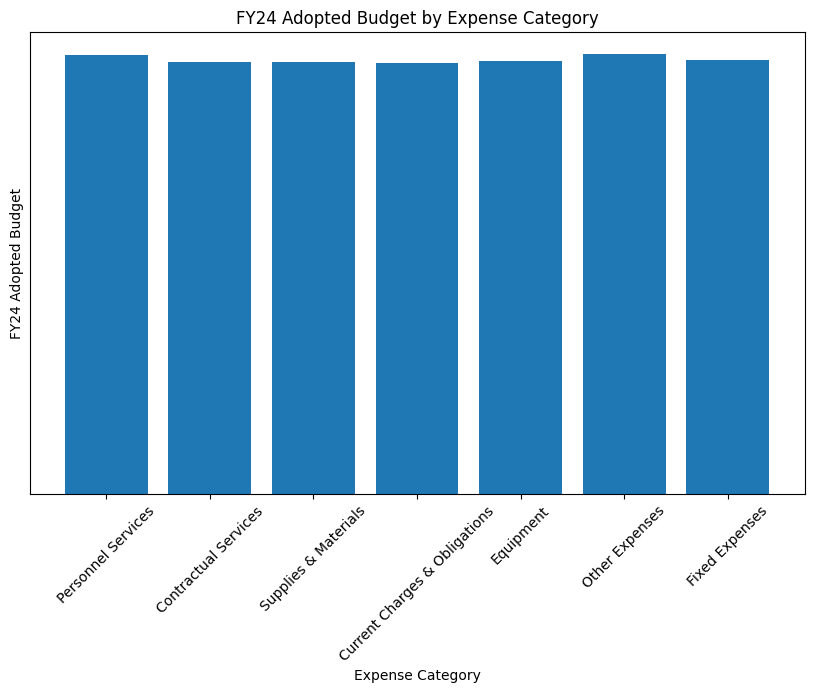

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(df['Expense Category'], df['FY24 Adopted'])
plt.xlabel('Expense Category')
plt.ylabel('FY24 Adopted Budget')
plt.title('FY24 Adopted Budget by Expense Category')
plt.xticks(rotation=45)
plt.yticks([])
plt.show()
# Budget in dollars allocation for each category

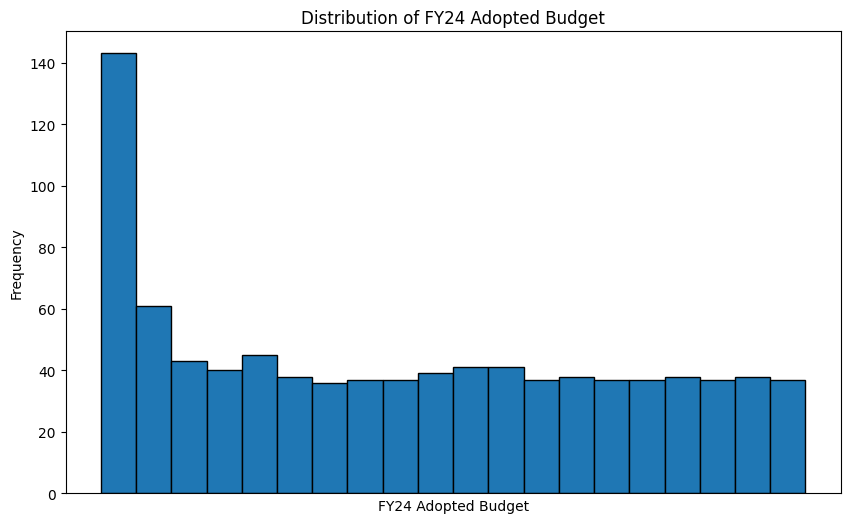

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['FY24 Adopted'], bins=20, edgecolor='k')
plt.xlabel('FY24 Adopted Budget')
plt.ylabel('Frequency')
plt.xticks([])
plt.title('Distribution of FY24 Adopted Budget')
plt.show()
# How many times each category occurs (x axis removed for readibility but can be added back)


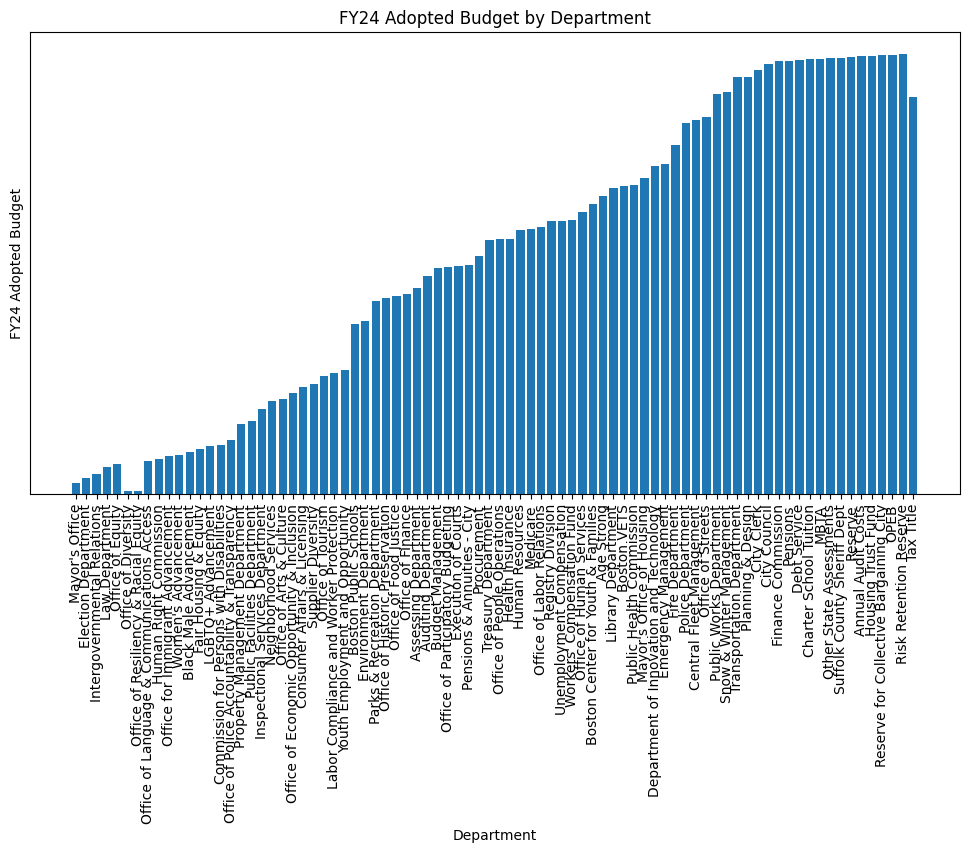

In [40]:
plt.figure(figsize=(12, 6))
plt.bar(df['Dept'], df['FY24 Adopted'])
plt.xlabel('Department')
plt.ylabel('FY24 Adopted Budget')
plt.title('FY24 Adopted Budget by Department')
plt.xticks(rotation=90)
plt.yticks([])
plt.show()


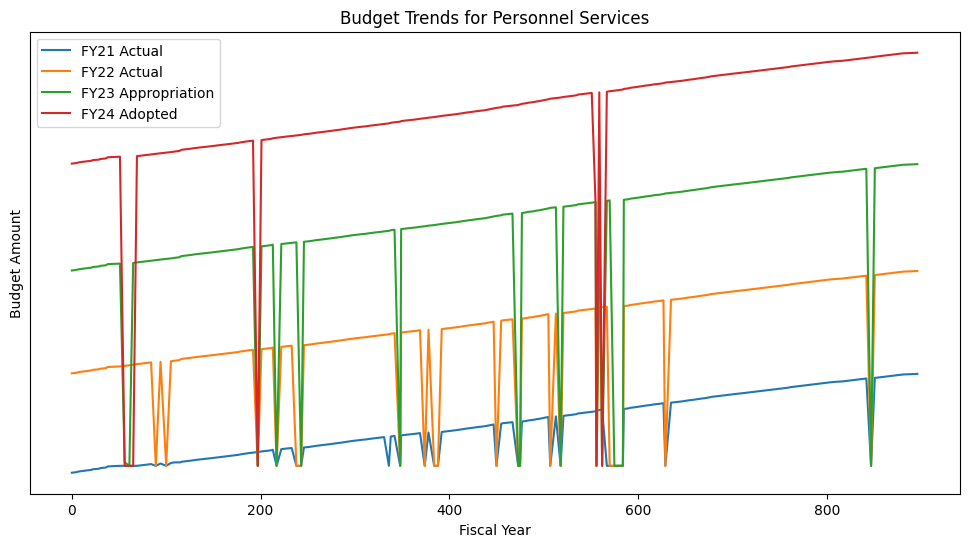

In [46]:
# Choose an Expense Category or Department
selected_category = 'Personnel Services'
selected_data = df[df['Expense Category'] == selected_category]

plt.figure(figsize=(12, 6))
plt.plot(selected_data['FY21 Actual Expense'], label='FY21 Actual')
plt.plot(selected_data['FY22 Actual Expense'], label='FY22 Actual')
plt.plot(selected_data['FY23 Appropriation'], label='FY23 Appropriation')
plt.plot(selected_data['FY24 Adopted'], label='FY24 Adopted')
plt.xlabel('Fiscal Year')
plt.ylabel('Budget Amount')
plt.title(f'Budget Trends for {selected_category}')
plt.legend()
plt.yticks([])
plt.show()
